## Doing a EDA about texi predictions, starting out with cleaning the data and understanding it

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv("../src/taxipred/data/taxi_trip_pricing.csv")

In [7]:
df.shape

(1000, 11)

In [8]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [10]:
df["Trip_Price"].value_counts()

Trip_Price
36.2624    1
52.9032    1
36.4698    1
15.6180    1
60.2028    1
          ..
34.4049    1
62.1295    1
33.1236    1
61.2090    1
45.4437    1
Name: count, Length: 951, dtype: int64

In [11]:
df["Trip_Price"].mean()

np.float64(56.87477332571041)

In [12]:
df["Per_Km_Rate"].mean()

np.float64(1.2333157894736844)

In [13]:
df["Time_of_Day"].value_counts()


Time_of_Day
Afternoon    371
Morning      283
Evening      203
Night         93
Name: count, dtype: int64

In [14]:
df_night = df[df["Time_of_Day"] == "Night"]
df_night.shape

(93, 11)

In [15]:
df_night["Trip_Price"].value_counts()

Trip_Price
88.132800     1
27.441500     1
69.626800     1
201.869509    1
39.236600     1
             ..
54.368400     1
93.509600     1
47.625200     1
59.607500     1
62.129500     1
Name: count, Length: 89, dtype: int64

In [16]:
df["Base_Fare"].mean()

np.float64(3.502989473684211)

In [17]:
df["Base_Fare"].value_counts()

Base_Fare
3.94    10
3.88     8
2.32     8
2.80     8
2.38     7
        ..
2.89     1
2.78     1
2.37     1
3.04     1
2.67     1
Name: count, Length: 290, dtype: int64

In [18]:
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [ ]:
df_group_sum = (
    df.groupby("Day_of_Week", as_index=False) 
    .agg(Total_Km=("Trip_Distance_km", "sum"),
    Total_Minutes=("Trip_Duration_Minutes", "sum"),
    Total_Price=("Trip_Price", "sum")
    .sort_values(["Day_of_Week"])
)

df_group_sum.shape

(2, 4)

In [20]:
df_group_sum.describe()

,Total_Km,Total_Minutes,Total_Price
count,2.000000,2.00000,2.000000
mean,12259.799759,28239.24000,25824.639516
std,6635.217597,15834.29872,14508.536688
min,7567.992402,17042.70000,15565.554839
25%,9913.896081,22640.97000,20695.097178
50%,12259.799759,28239.24000,25824.639516
75%,14605.703438,33837.51000,30954.181855
max,16951.607117,39435.78000,36083.724193


Text(0, 0.5, 'Total Price')

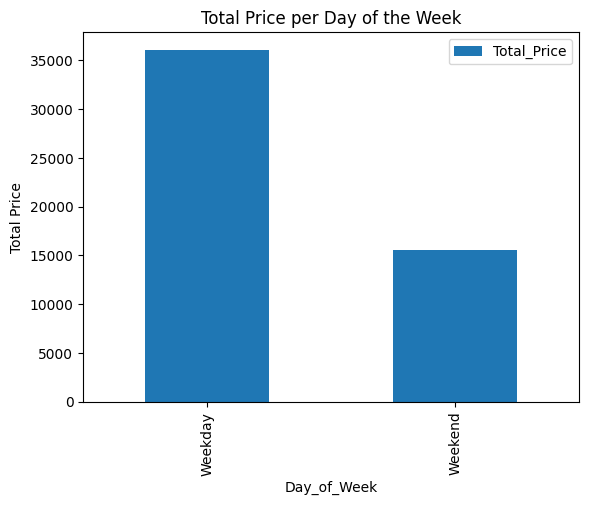

In [21]:
plt = df_group_sum.plot.bar(x="Day_of_Week", y="Total_Price", title="Total Price per Day of the Week")
plt.set_ylabel("Total Price")  

C:\Users\user\AppData\Local\Temp\ipykernel_4368\734897034.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt = sns.barplot(x="Time_of_Day", y="Trip_Price", data=df, palette="YlGn", legend=False)


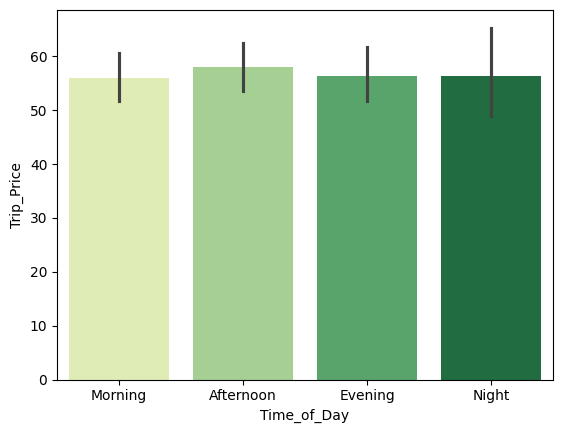

In [22]:
#plt = df(x="Time_of_Day", y="Trip_Price", title="Total Km per Day of the Week")
#sns.boxplot(x="Time_of_Day", y="Trip_Price", data=df)
plt = sns.barplot(x="Time_of_Day", y="Trip_Price", data=df, palette="YlGn", legend=False)

#plt.title("Trip Price Distribution by Time of Day")
#plt.xlabel("Time of Day")
#plt.show()

Text(0.5, 1.0, 'Trip Price vs Trip Distance')

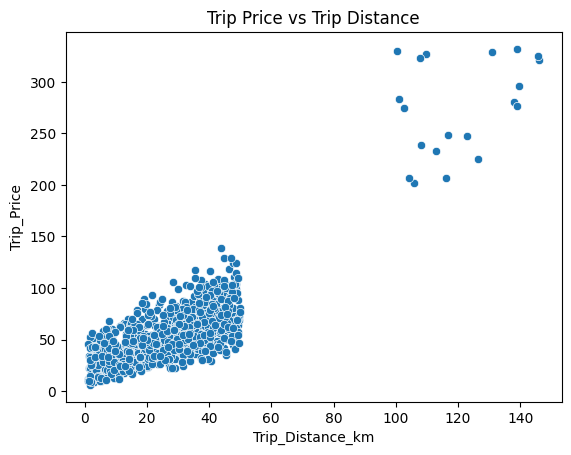

In [23]:
plt = sns.scatterplot(x="Trip_Distance_km", y="Trip_Price", data=df)
plt.set_title("Trip Price vs Trip Distance")    

AttributeError: 'Axes' object has no attribute 'show'

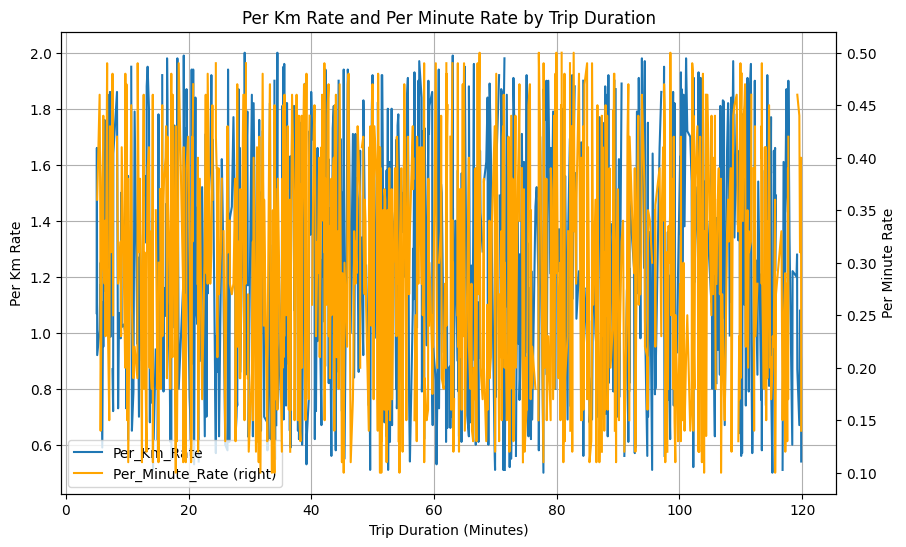

In [ ]:
grouped = (
    df.groupby("Trip_Duration_Minutes")
    .agg({"Per_Km_Rate": "mean", "Per_Minute_Rate": "mean"})
    .reset_index()
)

ax = grouped.plot(
    x="Trip_Duration_Minutes",
    y="Per_Km_Rate",
    legend=True,
    figsize=(10, 6),
    grid=True,
    title="Per Km Rate and Per Minute Rate by Trip Duration"
)
grouped.plot(
    x="Trip_Duration_Minutes",
    y="Per_Minute_Rate",
    ax=ax,
    secondary_y=True,
    legend=True,
    color="orange"
)

ax.set_ylabel("Per Km Rate")
ax.right_ax.set_ylabel("Per Minute Rate")
ax.set_xlabel("Trip Duration (Minutes)")
import matplotlib.pyplot as plt
plt.show()

Text(0, 0.5, 'Trip Price')

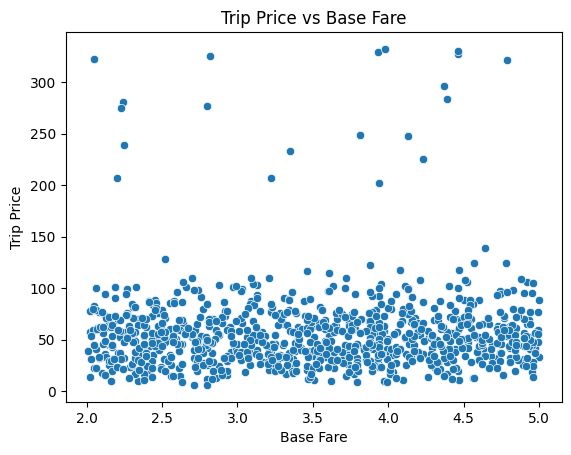

In [59]:
plt = sns.scatterplot(x = "Base_Fare", y = "Trip_Price", data = df)
plt.set_title("Trip Price vs Base Fare")
plt.set_xlabel("Base Fare")
plt.set_ylabel("Trip Price")

Text(0.5, 1.02, 'Pairplot of Trip Price vs Base Fare, Trip Distance and Trip Duration')

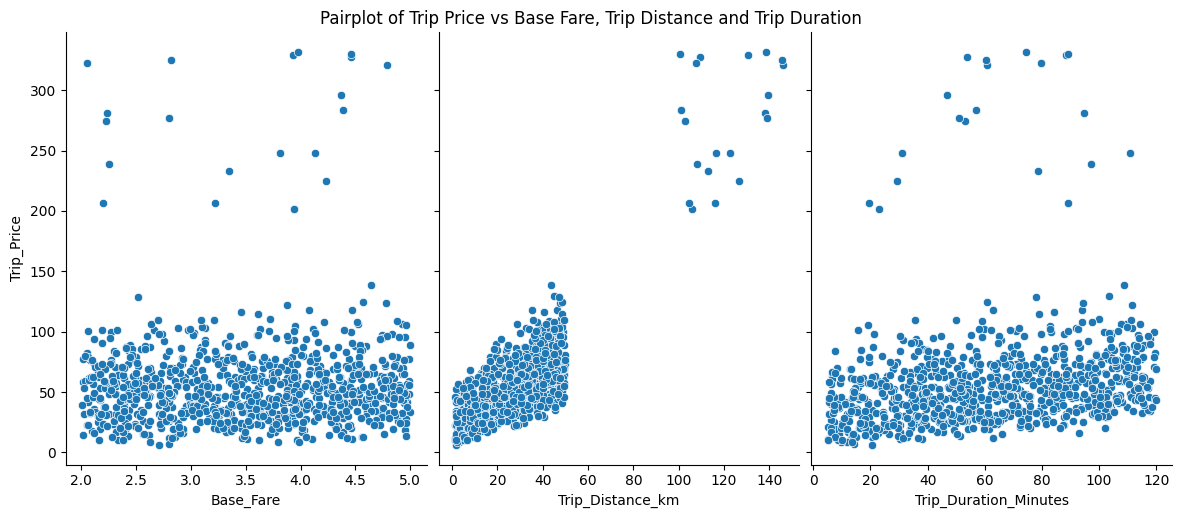

In [53]:
plt = sns.pairplot(df, x_vars=["Base_Fare", "Trip_Distance_km", "Trip_Duration_Minutes"], y_vars=["Trip_Price"], height=5, aspect=0.8, kind="scatter")
plt.figure.suptitle("Pairplot of Trip Price vs Base Fare, Trip Distance and Trip Duration", y=1.02)



In [54]:
df["Passenger_Count"].max()

np.float64(4.0)

In [60]:
df["Base_Fare"].max()

np.float64(5.0)

In [69]:
df["Base_Fare"].isnull().sum()


np.int64(50)

In [79]:
calculated_price = (
    df["Base_Fare"] 
    + df["Per_Km_Rate"] * df["Trip_Distance_km"] 
    + df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]
)

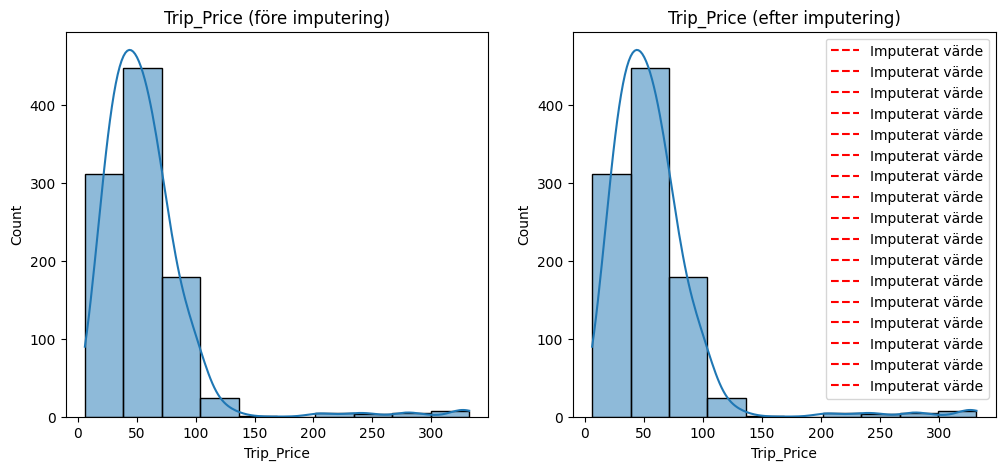

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

#chatgpt förslag för att titta om jag är galen

# Kopiera dataframe så vi kan jämföra före/efter
df_before = df.copy()

# Räkna ut priset för den saknade raden
calculated_price = (
    df["Base_Fare"] 
    + df["Per_Km_Rate"] * df["Trip_Distance_km"] 
    + df["Per_Minute_Rate"] * df["Trip_Duration_Minutes"]
)

# Fyll i NaN i Trip_Price
df["Trip_Price"] = df["Trip_Price"].fillna(calculated_price)

# Gör två subplots (före/efter)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Före
sns.histplot(df_before["Trip_Price"], kde=True, ax=axes[0], bins=10)
axes[0].set_title("Trip_Price (före imputering)")

# Efter
sns.histplot(df["Trip_Price"], kde=True, ax=axes[1], bins=10)
axes[1].set_title("Trip_Price (efter imputering)")

# Markera det uträknade priset på grafen efter
imputed_values = df.loc[df_before["Trip_Price"].isna(), "Trip_Price"]
for val in imputed_values:
    axes[1].axvline(val, color="red", linestyle="--", label="Imputerat värde")

# Lägg till legend bara om det finns något markerat
if not imputed_values.empty:
    axes[1].legend()

plt.show()

ConversionError: Failed to convert value(s) to axis units: masked_array(data=[--],
             mask=[ True],
       fill_value=1e+20,
            dtype=float64)

<Figure size 1200x500 with 2 Axes>